# Assignment 4

In this assignment, we will explore various loss functions and apply gradient descent methods to optimize these functions. Our focus will be on the Diabetes dataset from the scikit-learn library, a well-regarded dataset in the machine learning community. 

# Warmup

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

We first have to load the diabetes data and turn it into a pandas data frame.

In [2]:
diabetes = load_diabetes(scaled = False)
diabetes_df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                           columns=diabetes['feature_names'] + ['target'])

Then we will show the top 10 rows in it

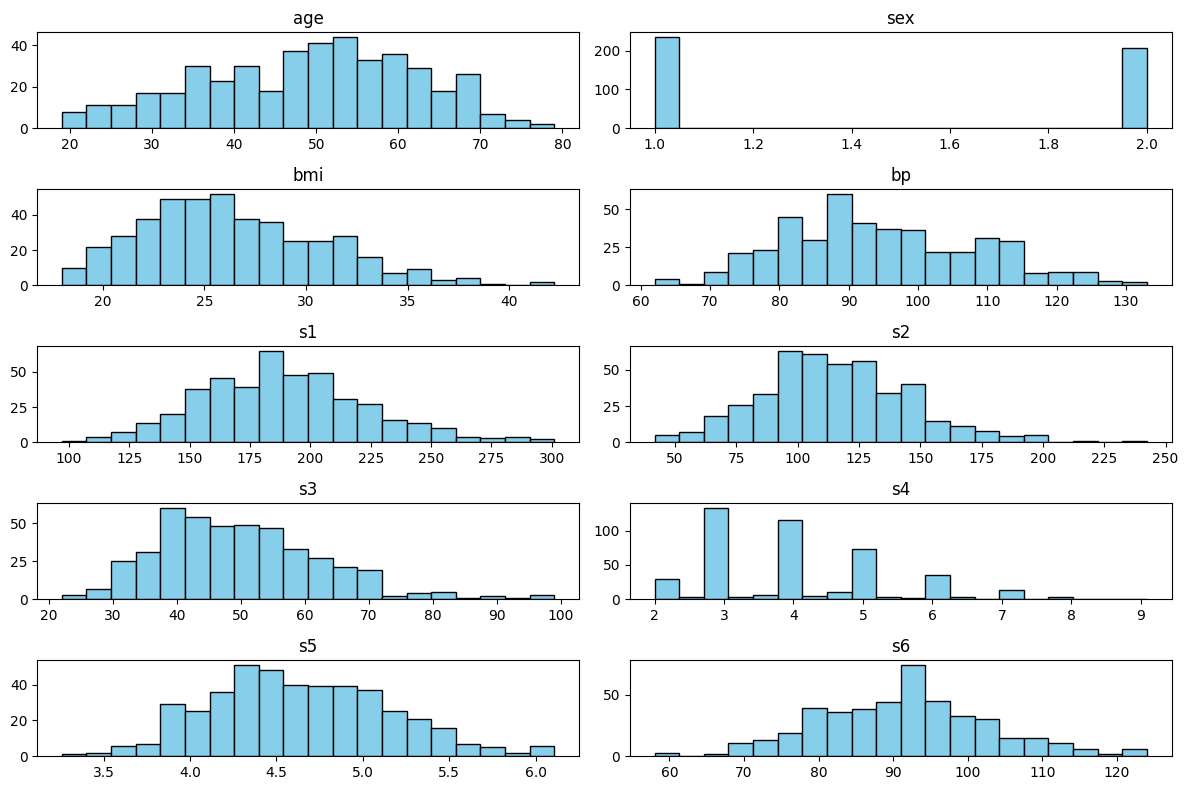

In [3]:
X = diabetes.data
num_features = X.shape[1]
num_rows = (num_features + 1) // 2  # To ensure the last plot is not empty if the number of features is odd

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))

for i in range(num_features):
    row = i // 2
    col = i % 2
    axes[row, col].hist(X[:, i], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(diabetes.feature_names[i])

# If the number of features is odd, remove the empty subplot
if num_features % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()

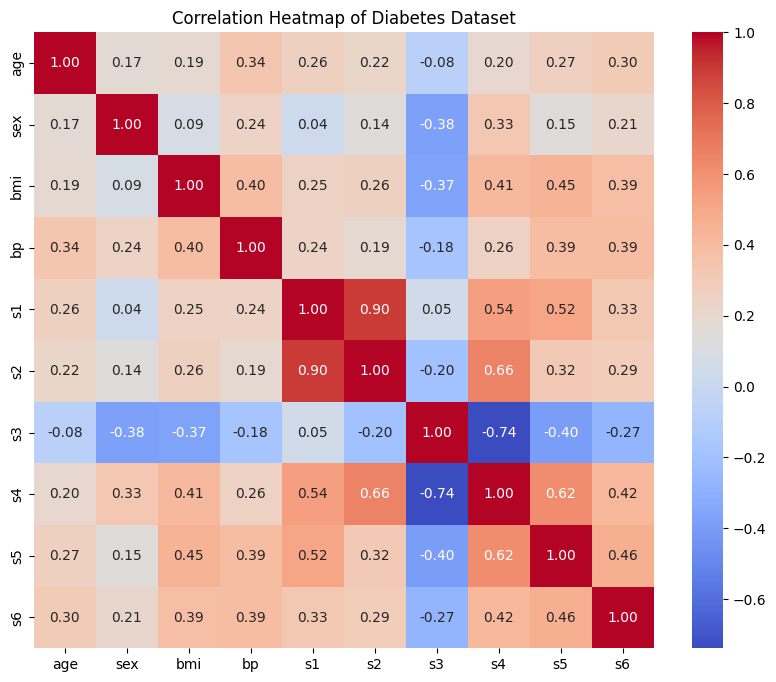

In [4]:
correlation_matrix = np.corrcoef(X, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=diabetes.feature_names, yticklabels=diabetes.feature_names)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

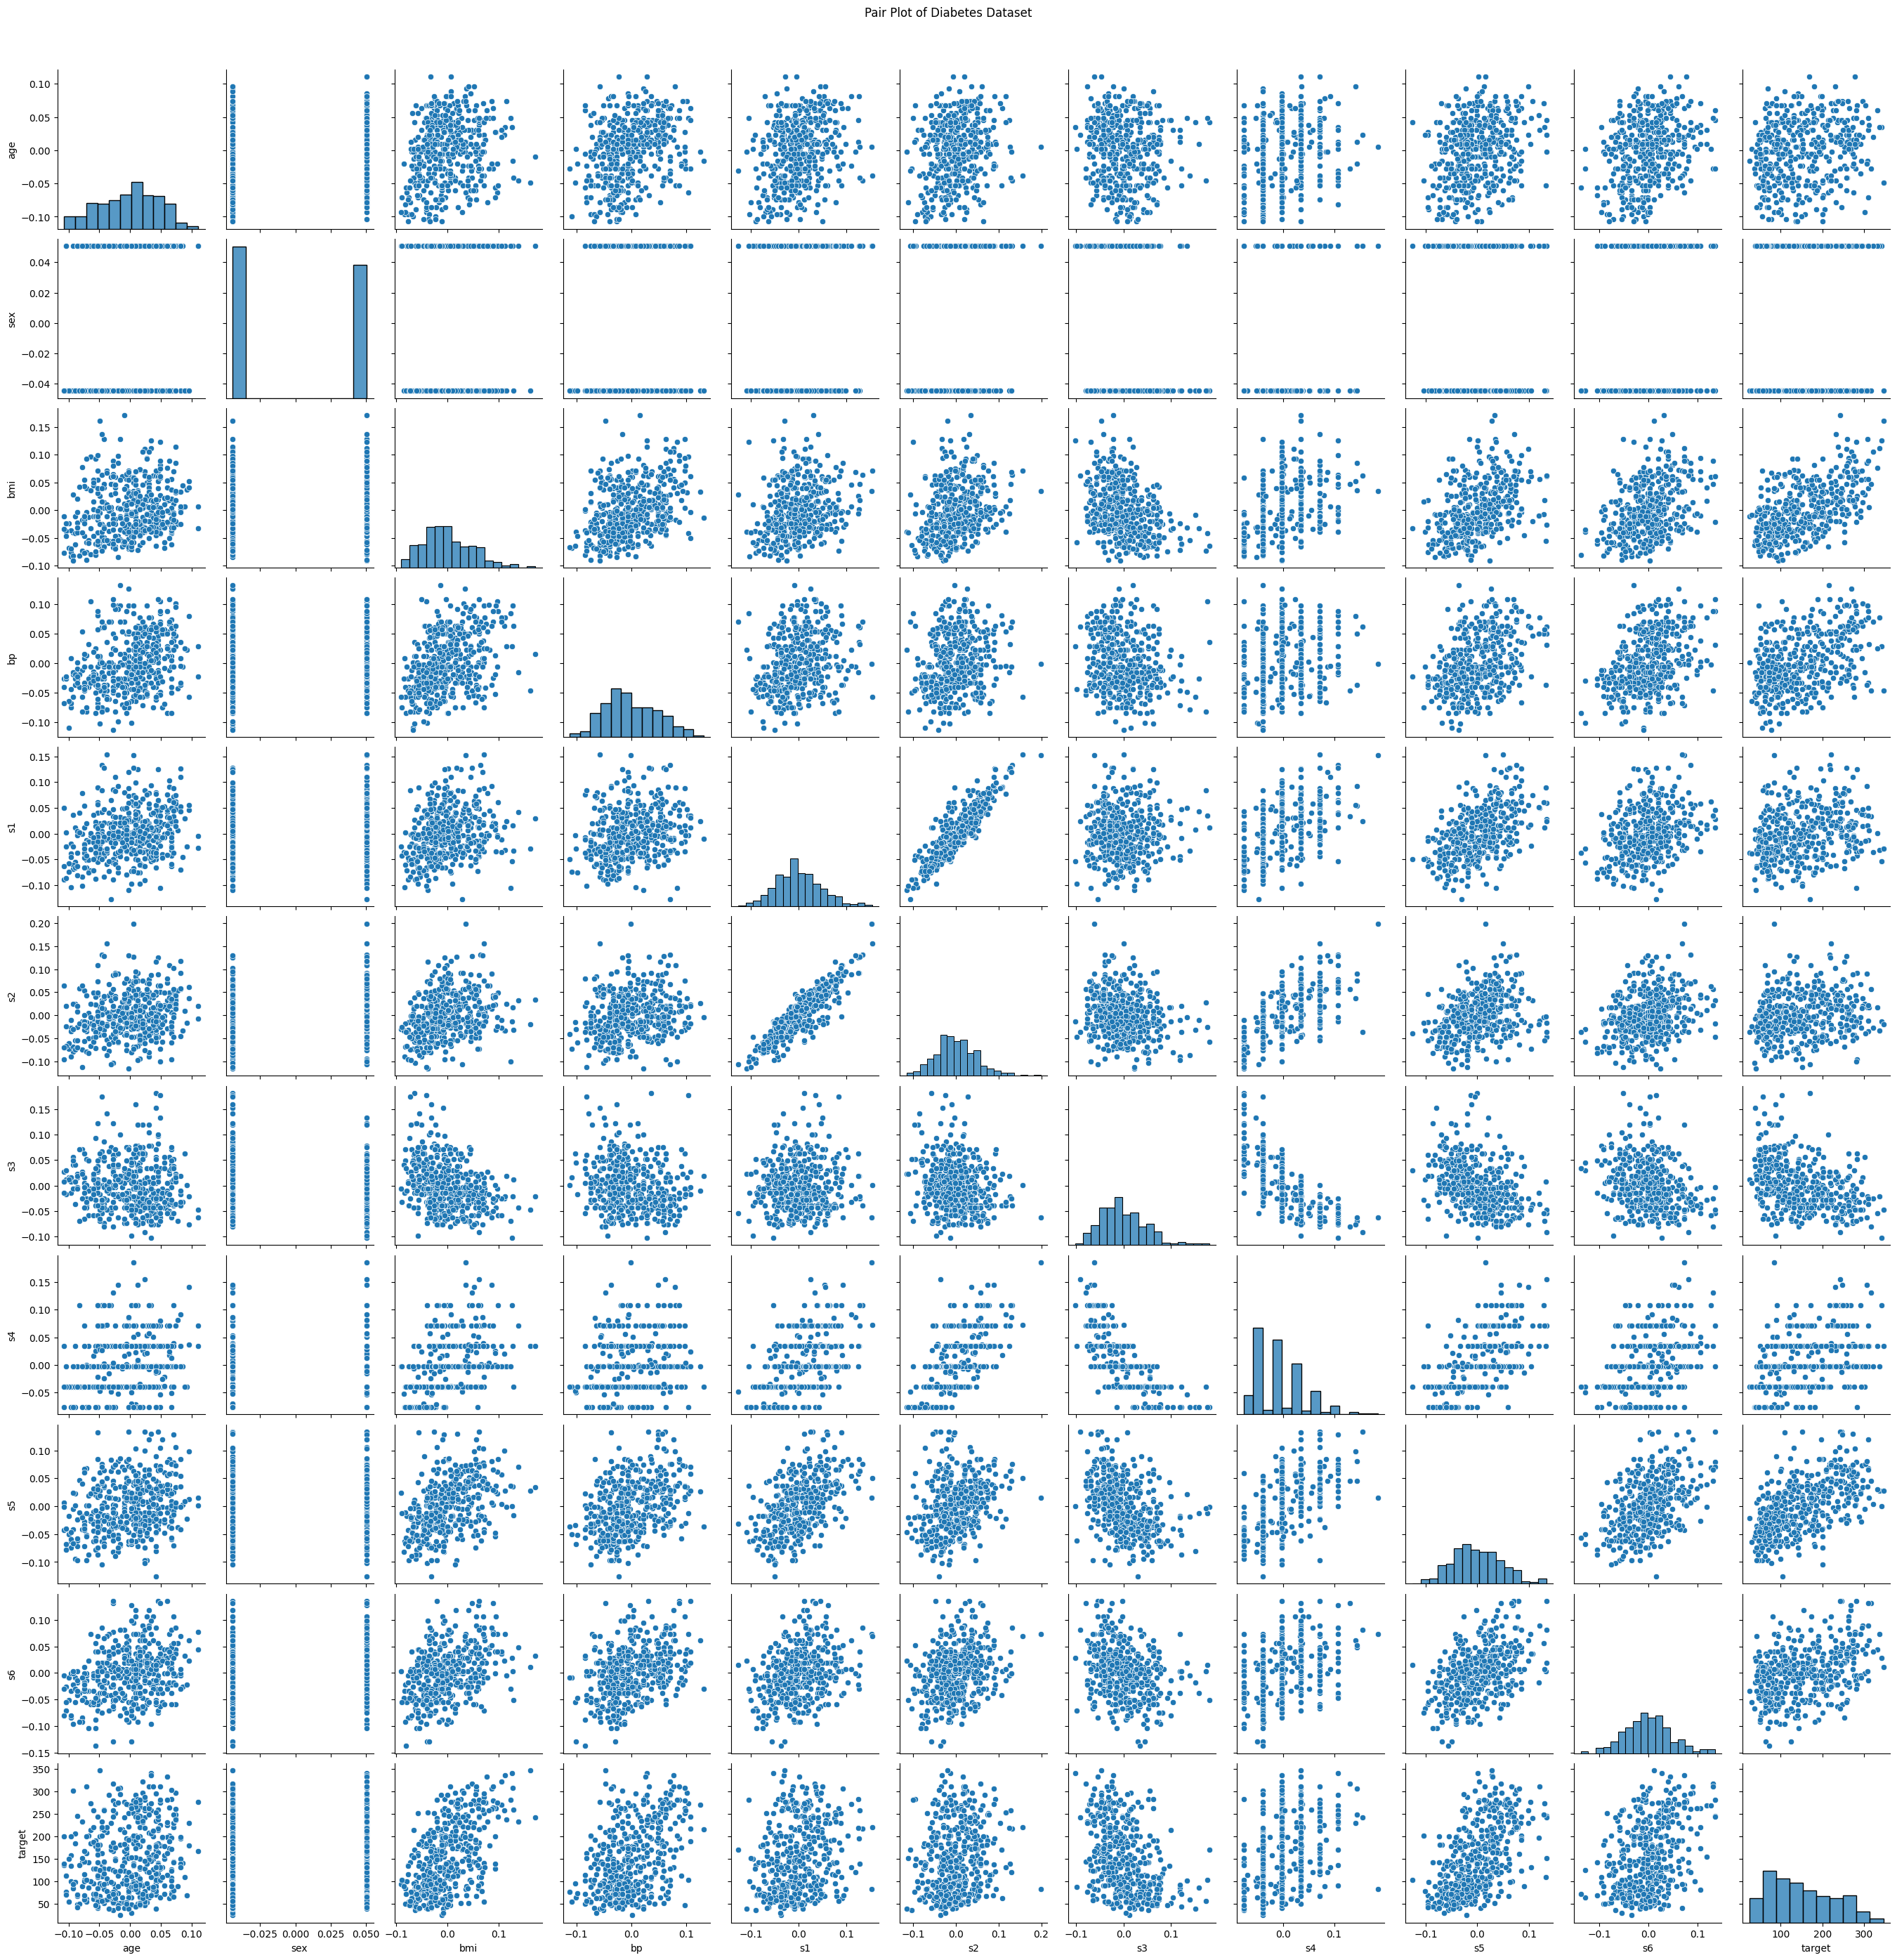

In [5]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert X into a pandas DataFrame for easier visualization
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

# Plot the pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of Diabetes Dataset', y=1.02)
plt.show()

In [6]:
display(diabetes_df.head(10))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


We can see that the categories include the person's age, whether they're female or male, their body mass index which is their weight divided by height, their blood pressure, and six different blood serum measurements.

Then we will print the categories to check that they are all numerical (they are)

In [7]:
diabetes_df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Now it's time to see if we have any nulls (We don't)

In [8]:
diabetes_df.isnull().any()

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool

Next is normalizing our data

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(diabetes['data'])
y = scaler.fit_transform(diabetes['target'].reshape(-1, 1))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

print("Number of instances of data in training set:", len(X_train))
print("Number of instances of data in testing set:", len(X_test))
print("Number of instances of target in training set:", len(y_train))
print("Number of instances of target in testing set:", len(y_test))

Number of instances of data in training set: 331
Number of instances of data in testing set: 111
Number of instances of target in training set: 331
Number of instances of target in testing set: 111


# Main Task

### Part 1: Functions’ Implementation

Implement the following functions from scratch: Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), R² Score (Coefficient of Determination)


MSE = (1 / n) * Σ(y_true - y_pred)²

In [6]:
def mean_squared_error(y_true, y_pred):
    n_samples = len(y_true)
    mse = np.sum((y_true - y_pred) ** 2) / n_samples
    return mse

MAE = (1 / n) * Σ|y_true - y_pred|


In [7]:
def mean_absolute_error(y_true, y_pred):
    n_samples = len(y_true)
    mae = np.sum(np.abs(y_true - y_pred)) / n_samples
    return mae

RMSE = sqrt(MSE)

In [8]:
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

R² = 1 - (Σ(y_true - y_pred)² / Σ(y_true - mean(y_true))²)

In [9]:
def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    total_sum_of_squares = np.sum((y_true - mean_y_true) ** 2)
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r2

### Part 2: Building and Training the Linear Regression Model
Construct a regression model (from scratch) and train it using the diabetes dataset

In [10]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features).reshape(-1, 1)
        self.bias = np.random.randn()
        
        for _ in range(self.n_iterations):
            y_pred = self.predict(X).reshape(-1, 1)
            
            dw = (1 / n_samples) * X.T@(y_pred - y)
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            '''print(f'weights shape: {self.weights.shape}')
            print(f'dw shape: {dw.shape}')
            print(f'X.T shape: {X.T.shape}')
            print(f'y_pred shape: {y_pred.shape}')
            print(f'y shape: {y.shape}')'''
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [11]:
model = LinearRegressionScratch(learning_rate=0.1, n_iterations=5000)
model.fit(X_train, y_train)

### Part 3: Model Evaluation

In [12]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

- Compare the predicted values with the actual progression measures using a scatter plot, where the x-axis represents the actual values, and the y-axis represents the predicted values.

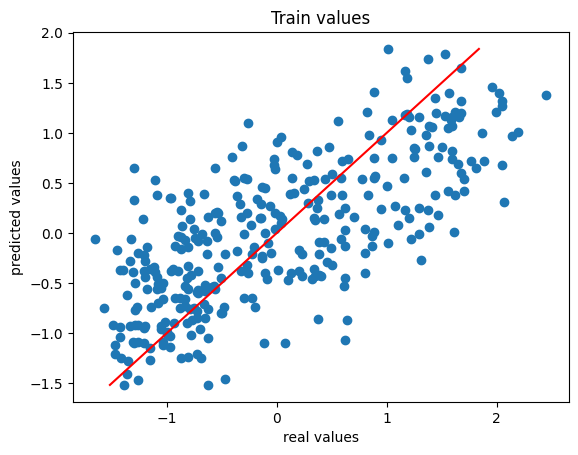

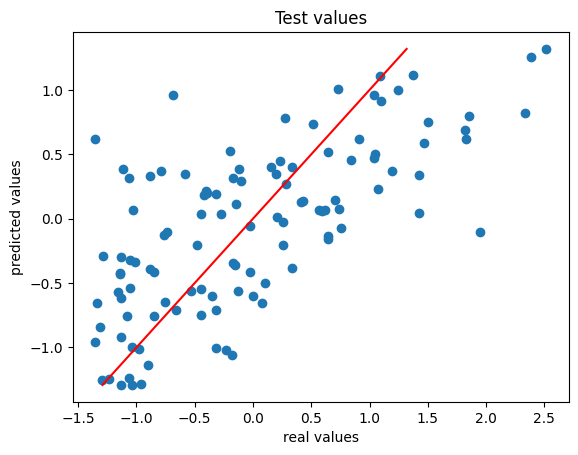

In [84]:
plt.scatter(y_train, y_train_pred)
plt.plot()
plt.title('Train values')
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.show()

plt.scatter(y_test, y_test_pred)
plt.title('Test values')
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.show()

- Evaluate the regression model on the training and testing data using the following functions:
- - MSE
- - MAE
- - RMSE
- - R² score


In [ ]:
print('Train scores:\n')
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"RMSE: {root_mean_squared_error(y_train, y_train_pred)}")
print(f"R2: {r2_score(y_train, y_train_pred)}")

print(100*'-')

print('Test scores:\n')
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_test_pred)}")
print(f"R2: {r2_score(y_test, y_test_pred)}")

Train scores:

MSE: 0.48395453507535613
MAE: 0.5613685029119444
RMSE: 0.6956684088524907
R2: 0.5277663725884527
----------------------------------------------------------------------------------------------------
Test scores:

MSE: 0.49291257373292585
MAE: 0.5613860838776865
RMSE: 0.7020773274596793
R2: 0.46725686361828567


Fill in the table (1) with the calculated metrics.

| Data Type/Optimizer | MSE | MAE | RMSE | R² score |
|----------|----------|----------|----------|----------|
| Train Set | 0.48395453507535613 | 0.5613685029119444 | 0.6956684088524907 | 0.5277663725884527 |
| Test Set | 0.49291257373292585 | 0.5613860838776865 | 0.7020773274596793 | 0.46725686361828567 |

### Part 4: Ordinary Least Squares
Use OLS from the scipy library, train the model, and finally display the statistics obtained from this process.


In [17]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.513
Method:                 Least Squares   F-statistic:                              35.87
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    1.19e-46
Time:                        00:48:28   Log-Likelihood:                         -349.58
No. Observations:                 331   AIC:                                      719.2
Df Residuals:                     321   BIC:                                      757.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Questions

### 1. Analyze and evaluate the values in Table (1). <br>
The model performs slightly worse on the test set compared to the training set, as seen in the higher MSE, RMSE, and lower R² values on the test set. <br>
The MAE values on both training and test sets are similar, indicating consistent performance in terms of average absolute error.<br>
The R² values suggest that the model explains around 53% of the variance in the target variable on the training set and 47% on the test set. This indicates moderate predictive power. <br>
The RMSE values show the average magnitude of errors made by the model, with lower values indicating better performance. <br><br><br>

### 2. Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.
**R² (R-squared):** <br>
R² represents the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. It ranges from 0 to 1, where 1 indicates a perfect fit. <br><br>

**Adjusted R² (Adjusted R-squared):** Adjusted R² is a modified version of R² that adjusts for the number of predictors in the model. It penalizes the addition of unnecessary variables that do not improve the model significantly. Adjusted R² increases only if the new term improves the model more than would be expected by chance. It is always lower than R², and it becomes more relevant as the number of predictors increases. <br><br>

**Implications of High or Low Values:**
- **High R² / Adjusted R²:** <br>
A high R² indicates a good fit between the data and the model, suggesting that the model explains a large portion of the variance in the dependent variable. <br>
High Adjusted R² suggests that the model's predictors are significant and contribute meaningfully to explaining the variance in the dependent variable. <br>
Overfitting may be a concern if R² is too high, as the model might be capturing noise rather than true patterns in the data.
In some cases, high R² values may lead to a false sense of confidence in the model's predictive power. <br><br>
- **Low R² / Adjusted R²:**<br>
A low R² suggests that the model does not explain much of the variance in the dependent variable, indicating poor model fit. Low R² values may indicate that the model needs improvement, such as adding more relevant predictors or choosing a different model. It may also suggest that there are underlying patterns in the data that the current model does not capture effectively. <br>
Low Adjusted R² may indicate that the model contains unnecessary variables that are not contributing to explaining the dependent variable. <br><br>

**Differences between R² and Adjusted R²:**
- **R²:**
Directly measures the proportion of variance explained by the model.
Can increase even with the addition of irrelevant predictors.
- **Adjusted R²:**
Penalizes the addition of unnecessary predictors by adjusting for the number of predictors in the model.
It is more conservative and provides a more accurate indication of the model's goodness of fit, especially with multiple predictors.<br><br><br>

### 3. Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values. <br>

In OLS regression, p-values associated with each predictor variable indicate the probability of obtaining the observed results if the null hypothesis (no effect of the predictor) is true. <br>

A common significance level is 0.05. A p-value below 0.05 is often considered statistically significant, indicating that the predictor has a significant impact on the dependent variable.<br>
P-values above 0.05 suggest that the predictor variable may not be statistically significant and could potentially be removed from the model. <br>

Every column except x1, x6, x7, x8 have suitable values.<br><br><br>

### 4. Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition. <br>
bmi (x3), bp (x4), and s5 (x9) have significant positive coefficients, indicating a strong positive impact on the diabetic condition. So focus on bmi (x3), bp (x4), and s5 (x9) as key predictors of an individual's diabetic condition. <br>
age (x1), s2 (x6), s3 (x7), s4 (x8), and s6 (x10) have coefficients with higher p-values, suggesting a weaker influence on the diabetic condition. So consider further investigation into the relationship between age (x1), s2 (x6), s3 (x7), s4 (x8), and s6 (x10) with the diabetic condition to better understand their contributions.

